HW 3

Arbaaz Shakir

Part 1

In [8]:
# load packages

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
%matplotlib inline

plt.rcParams['figure.figsize'] = 24, 20

import warnings
warnings.filterwarnings('ignore')

In [9]:
# load and split dataset

digits = load_digits()
xTrain0, xTest, yTrain0, yTest = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)
print ('Number of samples in training data:',len(xTrain0))
print ('Number of samples in test data:',len(xTest))

Number of samples in training data: 1437
Number of samples in test data: 360


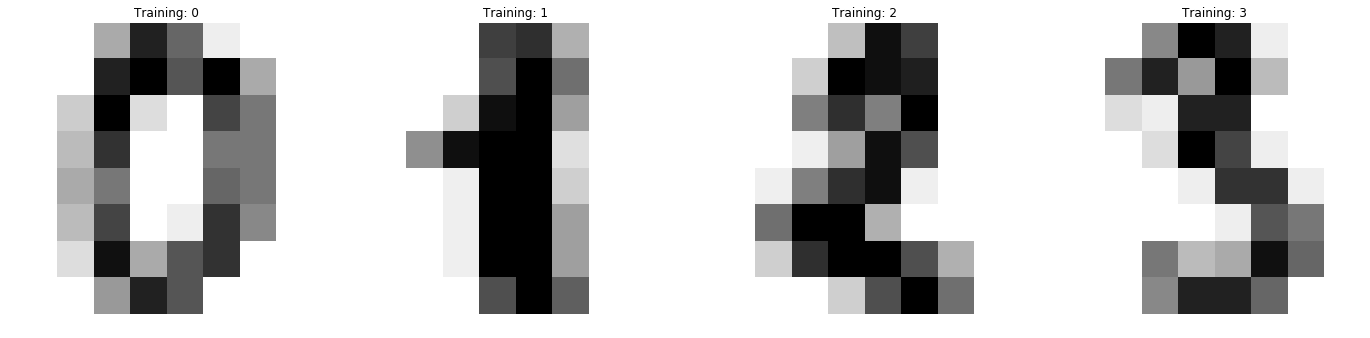

In [10]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [11]:
digits.keys()

dict_keys(['DESCR', 'data', 'target', 'target_names', 'images'])

In [12]:
len(digits.data)

1797

In [13]:
# initialize Stratified K-fold object

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(xTrain0, yTrain0)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [14]:
# split initial training set into training and validation sets

alphaRidge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
alphaLasso = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10]

mseRidgeArr = []
mseLassoArr = []

for trainIndex, valIndex in skf.split(xTrain0, yTrain0):
    # print("Train:", trainIndex, "Validation:", valIndex)
        
    # generate batches from indices
    xTrain, xVal = xTrain0[trainIndex], xTrain0[valIndex]
    yTrain, yVal = yTrain0[trainIndex], yTrain0[valIndex]
    
    for i in range(10):
        # initialize model
        ridgeReg = Ridge(alpha=alphaRidge[i], normalize=True)
        lassoReg = Lasso(alpha=alphaLasso[i], normalize=True, max_iter=1e5)
        
        # train model
        ridgeReg.fit(xTrain, yTrain)
        lassoReg.fit(xTrain, yTrain)
        
        # training accuracy
        trainingAccuracyRidge = ridgeReg.score(xTrain, yTrain)
        trainingAccuracyLasso = lassoReg.score(xTrain, yTrain)
        
        # validate model
        yPredRidge = ridgeReg.predict(xVal)
        yPredLasso = lassoReg.predict(xVal)
        
        # validation accuracy
        # mseRidge = np.mean(np.square(yVal - yPredRidge))
        mseRidge = mean_squared_error(yVal, yPredRidge)
        mseRidgeArr = np.append(mseRidgeArr, mseRidge)
        mseLasso = mean_squared_error(yVal, yPredLasso)
        mseLassoArr = np.append(mseLassoArr, mseLasso)

In [15]:
resultsRidge = pd.DataFrame()
resultsRidge['alpha'] = alphaRidge
resultsRidge['mse fold 1'] = mseRidgeArr[:10]
resultsRidge['mse fold 2'] = mseRidgeArr[10:20]
resultsRidge['mse fold 3'] = mseRidgeArr[20:30]
resultsRidge['mse fold 4'] = mseRidgeArr[30:40]
resultsRidge['mse fold 5'] = mseRidgeArr[40:50]
resultsRidge['mse fold 6'] = mseRidgeArr[50:60]
resultsRidge['mse fold 7'] = mseRidgeArr[60:70]
resultsRidge['mse fold 8'] = mseRidgeArr[70:80]
resultsRidge['mse fold 9'] = mseRidgeArr[80:90]
resultsRidge['mse fold 10'] = mseRidgeArr[90:100]

resultsRidge['mean mse'] = np.zeros(10)

for i in range(10):
    resultsRidge['mean mse'][i] = np.mean(resultsRidge.iloc[i-1,1:])

print('Optimal hyperparameter for ridge regression: ', resultsRidge['alpha'][resultsRidge['mean mse'].idxmin()])

Optimal hyperparameter for ridge regression:  1.0


In [16]:
resultsLasso = pd.DataFrame()
resultsLasso['alpha'] = alphaLasso
resultsLasso['mse fold 1'] = mseLassoArr[:10]
resultsLasso['mse fold 2'] = mseLassoArr[10:20]
resultsLasso['mse fold 3'] = mseLassoArr[20:30]
resultsLasso['mse fold 4'] = mseLassoArr[30:40]
resultsLasso['mse fold 5'] = mseLassoArr[40:50]
resultsLasso['mse fold 6'] = mseLassoArr[50:60]
resultsLasso['mse fold 7'] = mseLassoArr[60:70]
resultsLasso['mse fold 8'] = mseLassoArr[70:80]
resultsLasso['mse fold 9'] = mseLassoArr[80:90]
resultsLasso['mse fold 10'] = mseLassoArr[90:100]

resultsLasso['mean mse'] = np.zeros(10)

for i in range(10):
    resultsLasso['mean mse'][i] = np.mean(resultsLasso.iloc[i-1,1:])

print('Optimal hyperparameter for lasso regression: ', resultsLasso['alpha'][resultsLasso['mean mse'].idxmin()])

Optimal hyperparameter for lasso regression:  0.001


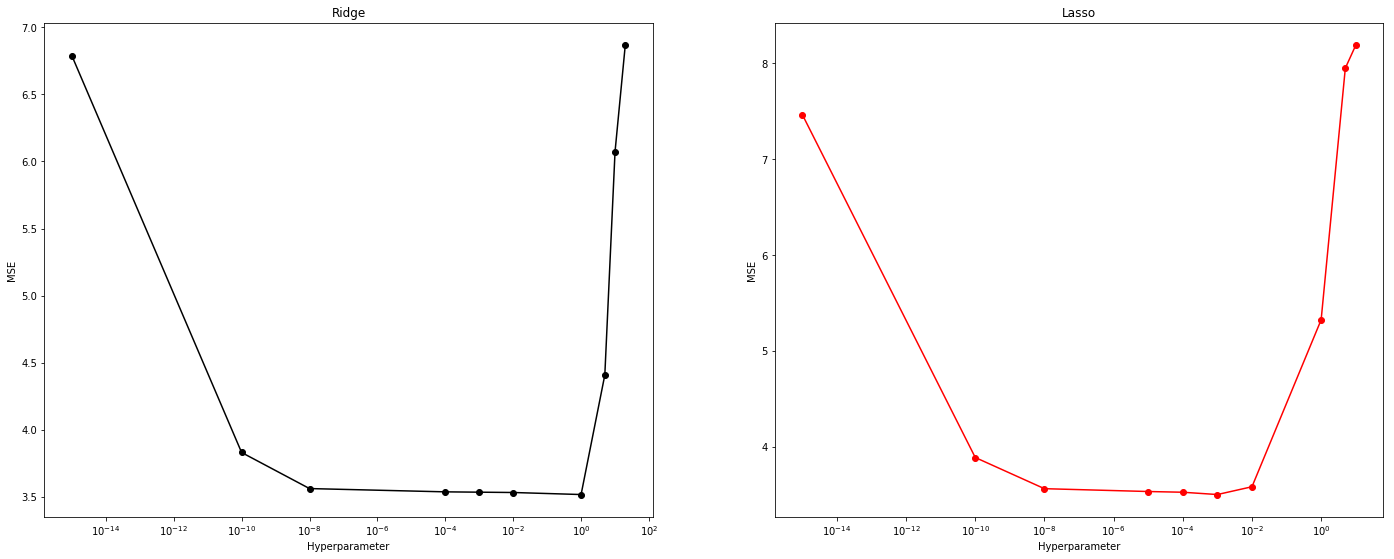

In [17]:
plt.subplot(2, 2, 1)
plt.semilogx(alphaRidge, resultsRidge['mean mse'], 'ko-')
plt.title('Ridge')
plt.xlabel('Hyperparameter')
plt.ylabel('MSE')

plt.subplot(2, 2, 2)
plt.semilogx(alphaLasso, resultsLasso['mean mse'], 'ro-')
plt.title('Lasso')
plt.xlabel('Hyperparameter')
plt.ylabel('MSE')

plt.show()

In [18]:
# logistic regression test using ridge with c = 1.0
logReg = LogisticRegression(penalty='l2', C=1.0)
logReg.fit(xTrain0, yTrain0)
trainingAccuracy = logReg.score(xTrain0, yTrain0)
print('Training accuracy: ', trainingAccuracy)
yPred = logReg.predict(xTest)
testAccuracy = logReg.score(xTest, yPred)
print('Accuracy of the model on unseen test data: ', testAccuracy)

Training accuracy:  0.9958246346555324
Accuracy of the model on unseen test data:  1.0


In [19]:
# logistic regression test using lasso with c = .001
logReg = LogisticRegression(penalty='l1', C=1.0)
logReg.fit(xTrain0, yTrain0)
trainingAccuracy = logReg.score(xTrain0, yTrain0)
print('Training accuracy: ', trainingAccuracy)
yPred = logReg.predict(xTest)
testAccuracy = logReg.score(xTest, yPred)
print('Accuracy of the model on unseen test data: ', testAccuracy)

Training accuracy:  0.9965205288796103
Accuracy of the model on unseen test data:  1.0


Part 2.1

In [37]:
# import packages
from __future__ import division, print_function, unicode_literals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline
plt.rcParams['figure.figsize'] = 24, 20

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [21]:
# import dataset
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

digits = load_digits()

In [22]:
xTrain, xTest, yTrain, yTest = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)
print ('Number of samples in training data:',len(xTrain))
print ('Number of samples in test data:',len(xTest))

Number of samples in training data: 1437
Number of samples in test data: 360


In [23]:
temp = np.zeros([1437, 2])
temp[:, 0] = yTrain

enc = OneHotEncoder()
enc.fit(temp)
temp2 = enc.transform(temp).toarray()
temp2.shape

temp2 = temp2[:,:-1]

yTrain = temp2

In [24]:
tempV = np.zeros([360, 2])
tempV[:, 0] = yTest

enc = OneHotEncoder()
enc.fit(tempV)
tempV2 = enc.transform(tempV).toarray()
tempV2.shape

tempV2 = tempV2[:,:-1]

yTest = tempV2

In [25]:
print("Shape of feature matrix:", xTrain.shape)
print("Shape of target matrix:", yTrain.shape)
print("One-hot encoding for 1st observation:\n", yTrain[0])

Shape of feature matrix: (1437, 64)
Shape of target matrix: (1437, 10)
One-hot encoding for 1st observation:
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


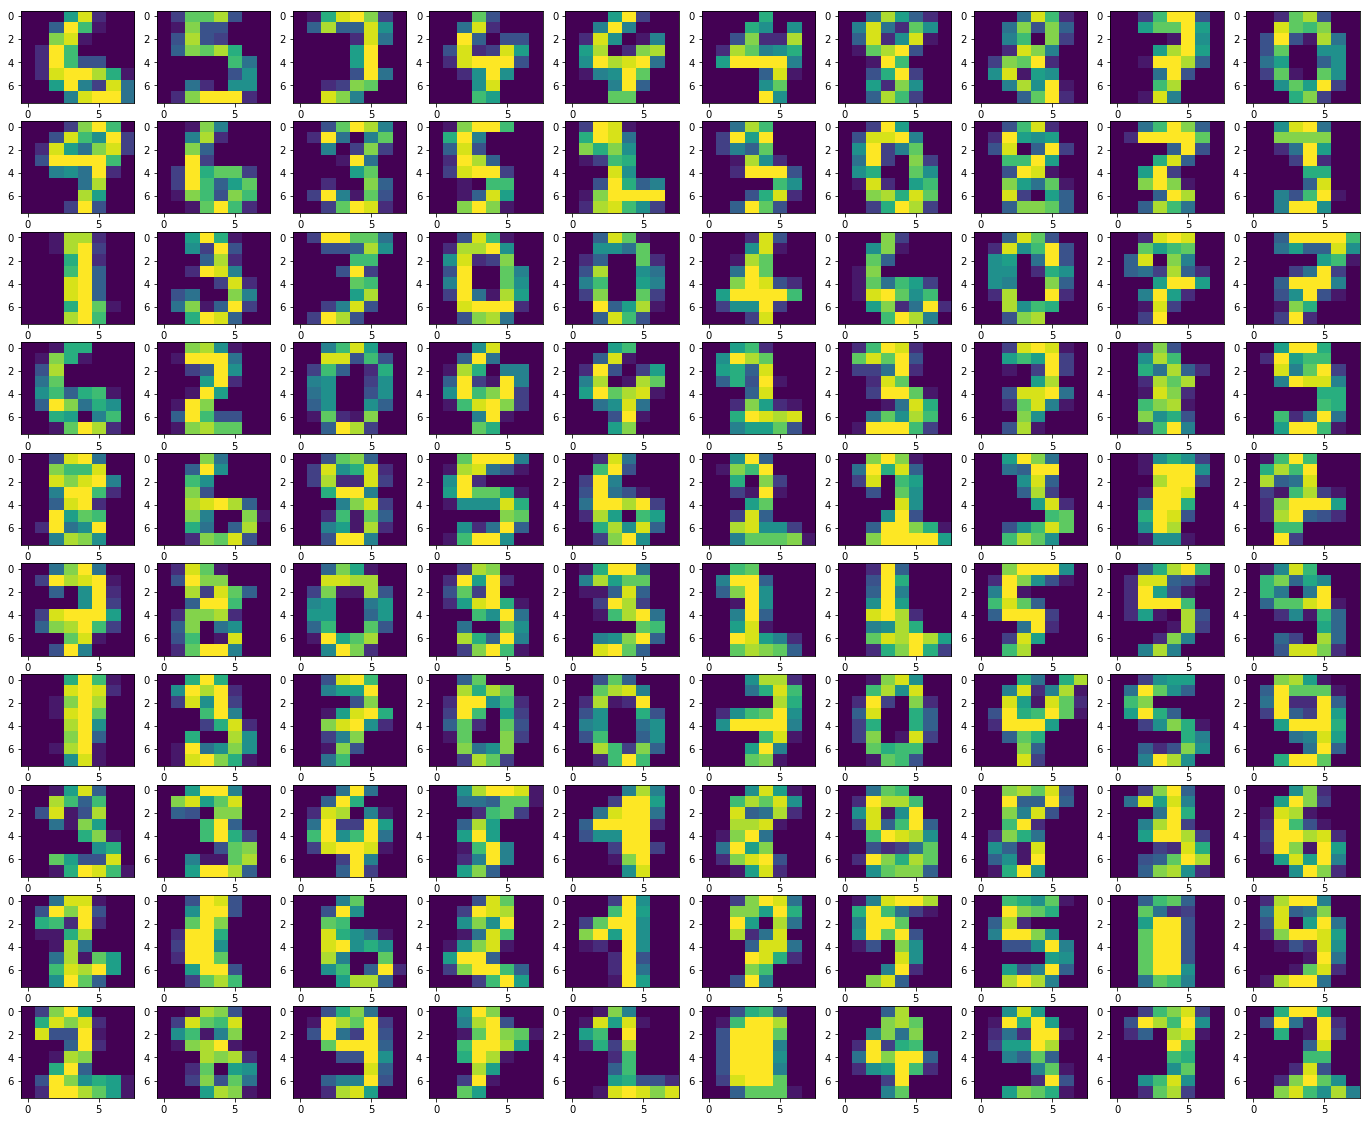

In [38]:
# visualize data by plotting images
fig, ax = plt.subplots(10,10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(xTrain[k].reshape(8,8), aspect='auto')
        k += 1
plt.show()

In [27]:
# Set parameters
learningRate = .001
epochs = 200
batchSize = 100
step = 10

In [28]:
# TF graph input
x = tf.placeholder("float", [None, 64]) # image of shape 8*8=64
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition = 10 classes

In [29]:
# Create model

# Set model weights
W = tf.Variable(tf.zeros([64, 10]))
b = tf.Variable(tf.zeros([10]))

with tf.name_scope("Wx_b") as scope:
    # Construct a linear model
    model = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
    
# Add summary ops to collect data
w_h = tf.summary.histogram("weights", W)
b_h = tf.summary.histogram("biases", b)

In [30]:
with tf.name_scope("costFunction") as scope:
    # Minimize error using cross entropy
    
    costFunction = tf.reduce_mean(-tf.reduce_sum(y*tf.log(model), reduction_indices=[1]))

    # Create a summary to monitor the cost function
    tf.summary.scalar("costFunction", costFunction)
    
with tf.name_scope("train") as scope:
    # Gradient descent
    optimizer = tf.train.GradientDescentOptimizer(learningRate).minimize(costFunction)

In [31]:
# Merge all summaries into a single operator
mergedSummaryOperator = tf.summary.merge_all()

In [32]:
# monitor accuracy
def acc():
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(model,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(accuracy, feed_dict={x: xTest, y: yTest}))

In [33]:
def nextBatch(start, epochIndex, batchSize, numExamples, epochsCompleted, xTrain, yTrain):
    # function that randomizes data batch and outputs mini-batch for next epoch
    start = epochIndex
    epochIndex += batchSize
    if epochIndex > numExamples:
        # finished epoch
        epochsCompleted += 1
        # shuffle data
        perm = np.arange(numExamples)
        np.random.shuffle(perm)
        xTrain = xTrain[perm]
        yTrain = yTrain[perm]
        # start next epoch
        start = 0
        epochIndex = batchSize
        assert batchSize <= numExamples
    end = epochIndex
    return xTrain[start:end], yTrain[start:end]

In [35]:
# Launch session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Set the logs writer to the desktop folder
    summaryWriter = tf.summary.FileWriter('/tmp/hw3/1')
    summaryWriter.add_graph(sess.graph)
    
    epochIndex = 0
    numExamples = len(xTrain)
    epochsCompleted = 0
    start = 0
    trAccArr = []
    teAccArr = []
    iArr = []

    # Training cycle
    for iteration in range(epochs):
        iArr = np.append(iArr, iteration)
        averageCost = 0.
        totalBatches = int(len(xTrain)/batchSize)
        # Loop over all batches
        for i in range(totalBatches):
            batch_xs, batch_ys = nextBatch(start, epochIndex, batchSize, numExamples, epochsCompleted, xTrain, yTrain)
            
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            
            # Compute the average loss
            averageCost += sess.run(costFunction, feed_dict={x: batch_xs, y: batch_ys})/totalBatches
            
            # Write logs for each iteration
            summaryStr = sess.run(mergedSummaryOperator, feed_dict={x: batch_xs, y: batch_ys})
            summaryWriter.add_summary(summaryStr, iteration*totalBatches + i)
        
        # Calculate training accuracy
        predictions = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
        accuracyTraining = tf.reduce_mean(tf.cast(predictions, "float"))
        tf.summary.scalar('trainingAccuracy', accuracyTraining)
        
        accTrain = accuracyTraining.eval(feed_dict={x: batch_xs, y: batch_ys})
        trAccArr = np.append(trAccArr, accTrain)
        
        # Calculate test accuracy
        accuracyTest = tf.reduce_mean(tf.cast(predictions, "float"))
        accTest = accuracyTest.eval(feed_dict={x: xTest, y: yTest})
        teAccArr = np.append(teAccArr, accTest)
        
        if iteration % step == 0:
            # Display cost per iteration step
            print( "Iteration:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(averageCost))
            print( "Training accuracy:", accuracyTraining.eval({x: batch_xs, y: batch_ys}))
            
    # Test the model
    predictions = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    
    tf.summary.scalar('testAccuracy', accuracyTest)
    print( "Test accuracy:", accuracyTest.eval({x: xTest, y: yTest}))    

Iteration: 0001 cost= 1.930395280
Training accuracy: 0.69
Iteration: 0011 cost= 0.405579214
Training accuracy: 0.99
Iteration: 0021 cost= 0.234730047
Training accuracy: 1.0
Iteration: 0031 cost= 0.166539906
Training accuracy: 1.0
Iteration: 0041 cost= 0.129179526
Training accuracy: 1.0
Iteration: 0051 cost= 0.105470212
Training accuracy: 1.0
Iteration: 0061 cost= 0.089065690
Training accuracy: 1.0
Iteration: 0071 cost= 0.077042326
Training accuracy: 1.0
Iteration: 0081 cost= 0.067856314
Training accuracy: 1.0
Iteration: 0091 cost= 0.060613105
Training accuracy: 1.0
Iteration: 0101 cost= 0.054758000
Training accuracy: 1.0
Iteration: 0111 cost= 0.049928667
Training accuracy: 1.0
Iteration: 0121 cost= 0.045878503
Training accuracy: 1.0
Iteration: 0131 cost= 0.042433844
Training accuracy: 1.0
Iteration: 0141 cost= 0.039468915
Training accuracy: 1.0
Iteration: 0151 cost= 0.036890421
Training accuracy: 1.0
Iteration: 0161 cost= 0.034627719
Training accuracy: 1.0
Iteration: 0171 cost= 0.03262

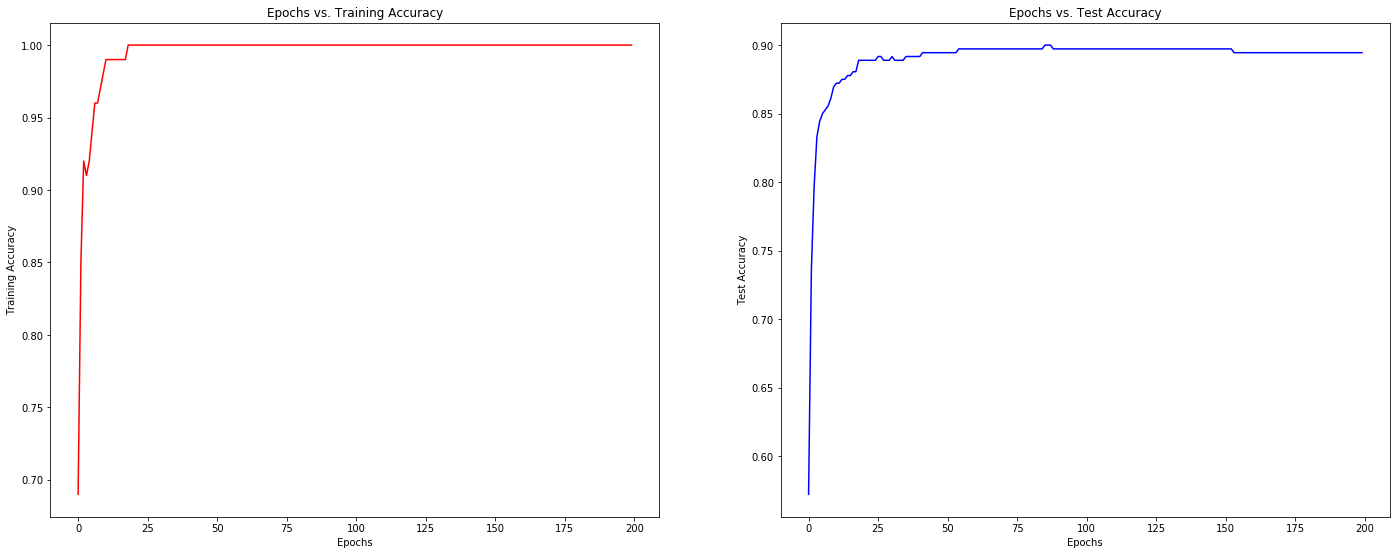

In [39]:
# plot training accuracy
plt.subplot(2, 2, 1)
plt.plot(iArr, trAccArr, 'r')
plt.title('Epochs vs. Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

# plot test accuracy
plt.subplot(2, 2, 2)
plt.plot(iArr, teAccArr, 'b')
plt.title('Epochs vs. Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')

plt.show()

Part 2.2

In [1]:
# import packages
from __future__ import division, print_function, unicode_literals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.INFO)

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\arbaa\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Read input_data (not as one_hot)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

In [3]:
xTrain, xTest, yTrain, yTest = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)
print ('Number of samples in training data:',len(xTrain))
print ('Number of samples in test data:',len(xTest))

Number of samples in training data: 1437
Number of samples in test data: 360


In [4]:
# define features
featureCols = tf.contrib.learn.infer_real_valued_columns_from_input(xTrain)

# validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
#     xTest,
#     yTest,
#     every_n_steps=10)

# dense neural network classifier
# 3 layers: 300, 200 and 100
# 10 classes

learningRate = .001
with tf.name_scope("dnnClf"):
    dnnClf = tf.contrib.learn.DNNClassifier(hidden_units=[300,200,100],
                                        feature_columns=featureCols,
                                        n_classes=10,
                                        model_dir='/tmp/hw3/2',
                                        optimizer=tf.train.GradientDescentOptimizer(learningRate),
                                        activation_fn=tf.nn.tanh,
                                        dropout=.1,
                                        config=tf.estimator.RunConfig().replace(save_summary_steps=10))

    # if TensorFlow >= 1.1, make compatible with sklearn
    dnnClf = tf.contrib.learn.SKCompat(dnnClf)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_summary_steps': 10, '_is_chief': True, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_service': None, '_evaluation_master': '', '_model_dir': '/tmp/hw3/2', '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec objec

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Set the logs writer to the desktop folder
    summaryWriter = tf.summary.FileWriter('/tmp/hw3/2')
    summaryWriter.add_graph(sess.graph)
    
    # fit the model, 1000 iterations
    dnnClf.fit(xTrain, yTrain, batch_size=100, steps=1000)
    
    # test model
    yPred = dnnClf.predict(xTest)
    print()
    
    # Calculate accuracies
    print('Accuracy: ', accuracy_score(yTest, yPred['classes']))
    tf.summary.scalar('testAccuracy', accuracy_score(yTest, yPred['classes']))

Instructions for updating:
Please access pandas data directly.
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/hw3/2\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11001 into /tmp/hw3/2\model.ckpt.
INFO:tensorflow:loss = 0.067857884, step = 11001
INFO:tensorflow:global_step/sec: 108.17
INFO:tensorflow:loss = 0.059166122, step = 11101 (0.926 sec)
INFO:tensorflow:global_step/sec: 176.988
INFO:tensorflow:loss = 0.03389227, step = 11201 (0.565 sec)
INFO:tensorflow:global_step/sec: 146.13
INFO:tensorflow:loss = 0.050892644, step = 11301 (0.684 sec)
INFO:tensorflow:global_step/sec: 157.933
INFO:tensorflow:loss = 0.042531513, step = 11401 (0.634 sec)
INFO:t

                                                                                The End.